,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


No hay duplicados en el dataset
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male'],
      dtype='object')


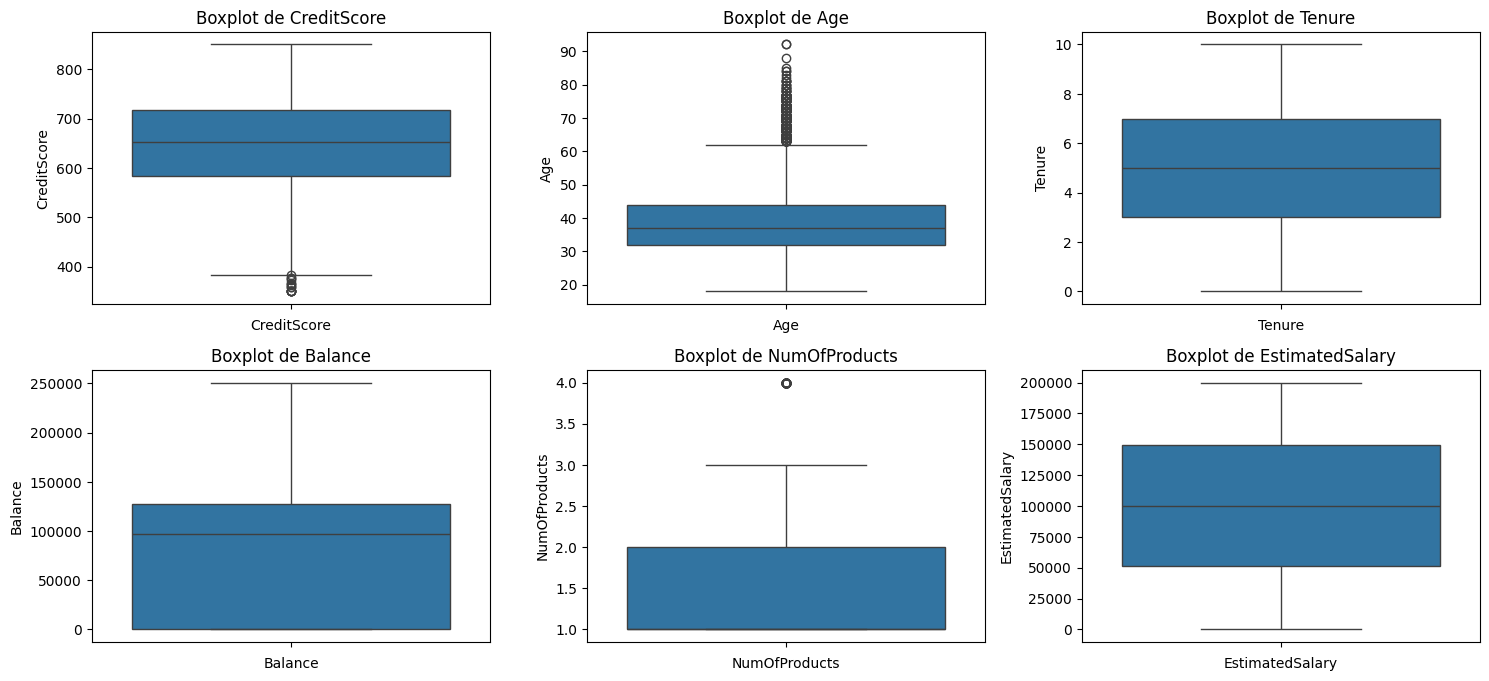

Tamaño original: 10000
Tamaño sin outliers: 9985


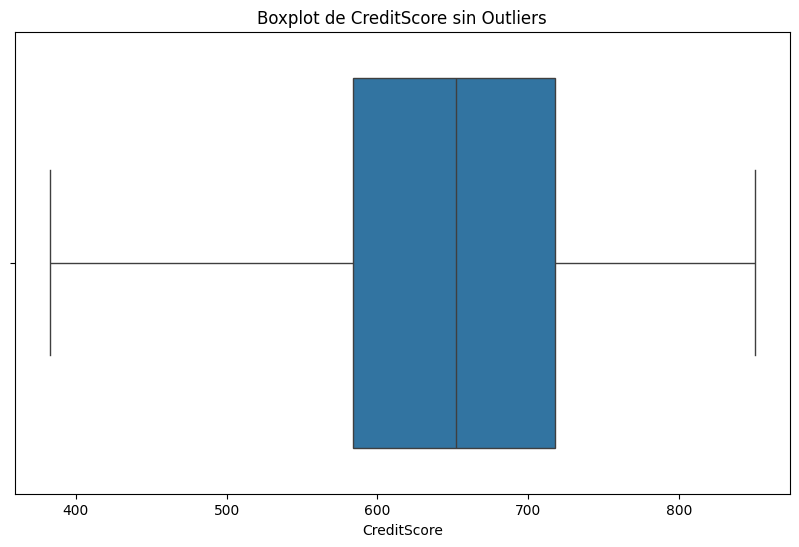

Tamaño sin outliers para Age: 9398


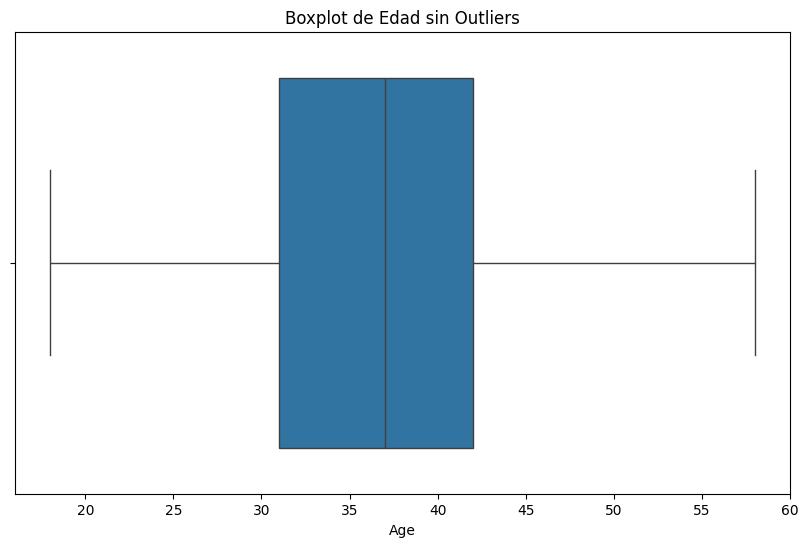

Tamaño sin outliers para NumOfProducts: 9343


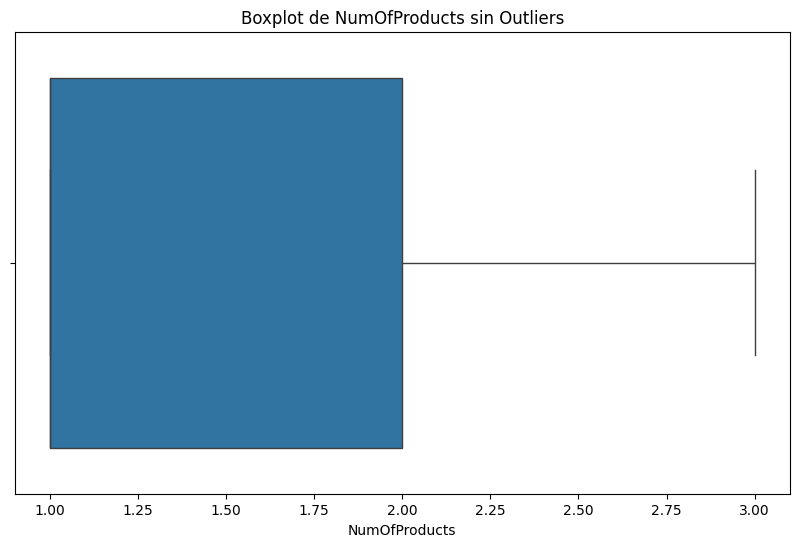

Estadísticas Descriptivas:



,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9343.000000,9.343000e+03,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000
mean,4995.712405,1.569085e+07,650.799957,37.189554,5.016911,76353.798203,1.518142,0.705127,0.499732,100144.032720,0.191694
std,2888.847086,7.193109e+04,95.952078,8.141197,2.888518,62444.180280,0.549681,0.456010,0.500027,57483.691575,0.393655
min,1.000000,1.556570e+07,383.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2482.500000,1.562825e+07,584.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51257.330000,0.000000
50%,5014.000000,1.569132e+07,652.000000,37.000000,5.000000,97041.160000,1.000000,1.000000,0.000000,100236.020000,0.000000
75%,7483.500000,1.575295e+07,717.000000,42.000000,7.000000,127597.785000,2.000000,1.000000,1.000000,149392.065000,0.000000
max,10000.000000,1.581569e+07,850.000000,58.000000,10.000000,250898.090000,3.000000,1.000000,1.000000,199992.480000,1.000000


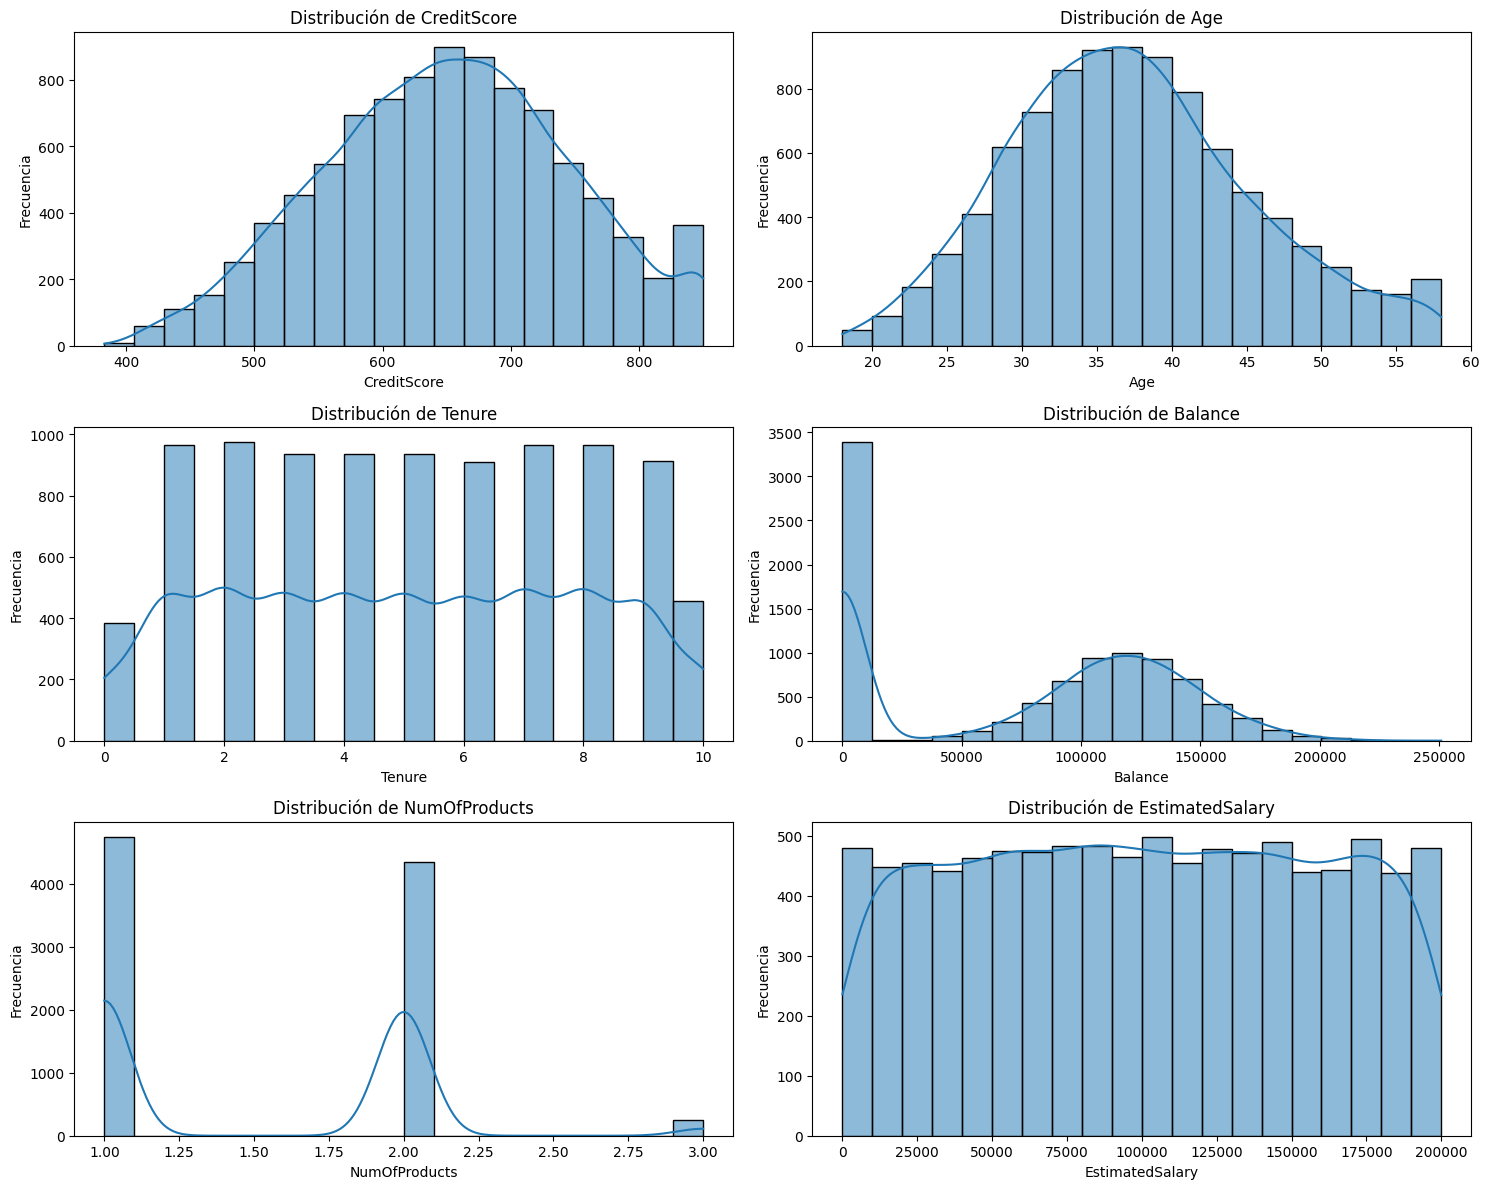

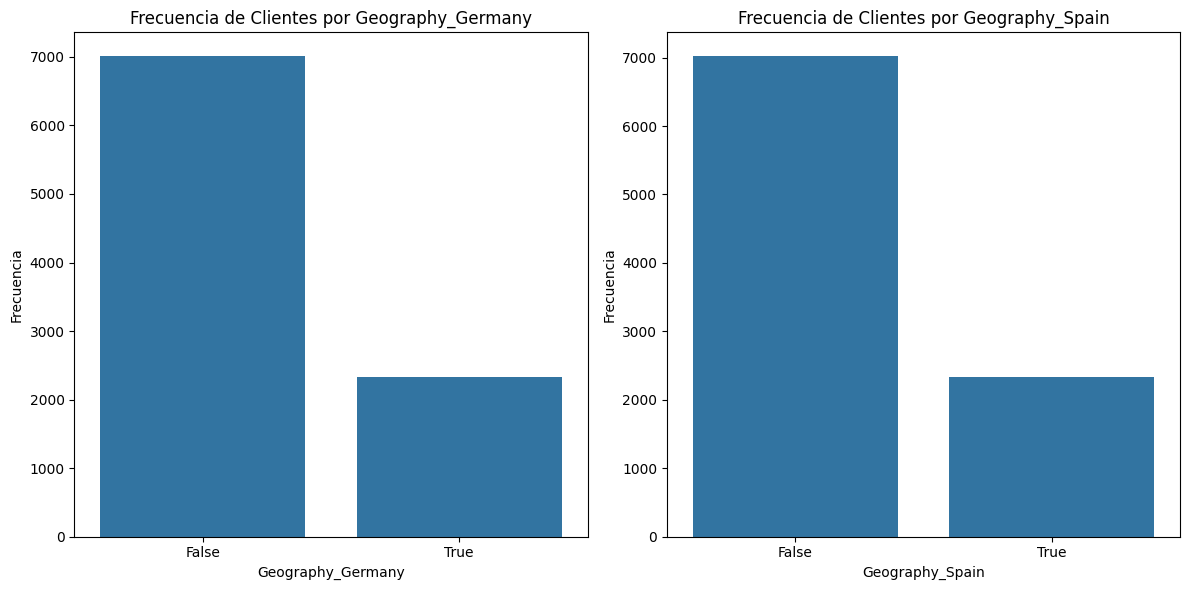

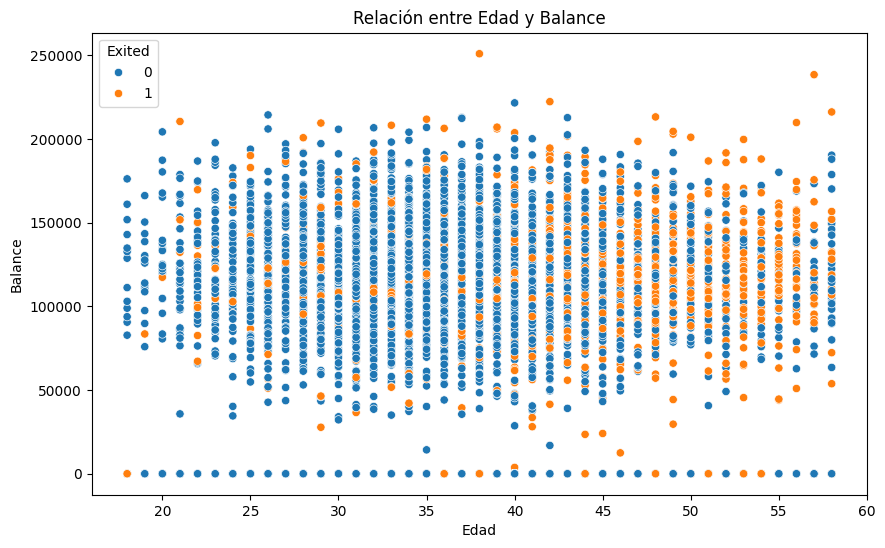

In [ ]:
#PROYECTO 01
#Integrante- Aranza Moreira Sanchez 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
url = 'https://raw.githubusercontent.com/samuelsaldanav/datasets/main/Bank%20Customer%20Churn%20Prediction/Churn_Modelling.csv'
data = pd.read_csv(url)

display(data.head())

# Eliminar valores nulos
data_cleaned = data.dropna()

# Duplicados
duplicates = data_cleaned.duplicated().sum()
if duplicates > 0:
    print(f'Existen {duplicates} duplicados en el dataset')
else:
    print('No hay duplicados en el dataset')

# variables categóricas
data_encoded = pd.get_dummies(data_cleaned, columns=['Geography', 'Gender'], drop_first=True)

# Ver las columnas generadas por pd.get_dummies
print(data_encoded.columns)

# outliers en variables numéricas
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data_encoded[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

# conversion
Q1 = data_encoded['CreditScore'].quantile(0.25)
Q3 = data_encoded['CreditScore'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_cleaned = data_encoded[(data_encoded['CreditScore'] >= lower_bound) & (data_encoded['CreditScore'] <= upper_bound)]

print(f"Tamaño original: {data_encoded.shape[0]}")
print(f"Tamaño sin outliers: {data_cleaned.shape[0]}")

plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['CreditScore'])
plt.title('Boxplot de CreditScore sin Outliers')
plt.show()

Q1 = data_cleaned['Age'].quantile(0.25)
Q3 = data_cleaned['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.2 * IQR
data_cleaned = data_cleaned[(data_cleaned['Age'] >= lower_bound) & (data_cleaned['Age'] <= upper_bound)]

print(f"Tamaño sin outliers para Age: {data_cleaned.shape[0]}")

plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['Age'])
plt.title('Boxplot de Edad sin Outliers')
plt.show()

Q1 = data_cleaned['NumOfProducts'].quantile(0.25)
Q3 = data_cleaned['NumOfProducts'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_cleaned = data_cleaned[(data_cleaned['NumOfProducts'] >= lower_bound) & (data_cleaned['NumOfProducts'] <= upper_bound)]

print(f"Tamaño sin outliers para NumOfProducts: {data_cleaned.shape[0]}")

plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['NumOfProducts'])
plt.title('Boxplot de NumOfProducts sin Outliers')
plt.show()

# Estadísticas descriptivas
statistics = data_cleaned.describe()
print("Estadísticas Descriptivas:\n")
display(statistics)

# histogramas
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data_cleaned[col], bins=20, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Visualización gráficos de barras
plt.figure(figsize=(12, 6))

geo_columns = [col for col in data_cleaned.columns if 'Geography_' in col]

# Gráficos de columna de Geografía
for i, geo_col in enumerate(geo_columns, 1):
    plt.subplot(1, len(geo_columns), i)
    sns.countplot(x=geo_col, data=data_cleaned)  # Usar 'data_cleaned' porque es el DataFrame después de pd.get_dummies()
    plt.title(f'Frecuencia de Clientes por {geo_col}')
    plt.xlabel(geo_col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=data_cleaned)
plt.title('Relación entre Edad y Balance')
plt.xlabel('Edad')
plt.ylabel('Balance')
plt.show()

# dataset limpio
data_cleaned.to_csv('/content/cleaned_dataset.csv', index=False)


